![Fixel Algorithms](https://fixelalgorithms.co/images/CCExt.png)

# <center> Machine Learning Methods </center>
## <center> Lecture 3 - Discriminative Classification </center>
### <center> K-Nearest Neighbors (K-NN)</center>

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/FixelAlgorithmsTeam/FixelCourses/blob/master/MachineLearningMethod/03_DiscriminativeClassfication/MainKnnExample.ipynb)

In [1]:
import numpy             as np
import matplotlib.pyplot as plt
import matplotlib

matplotlib.rc('font', **{'size':16})

### Generate data:

In [2]:
N   = 250
mX1 = np.random.rand(2, N) + np.array([[.6], [0]])
mX2 = np.random.rand(2, N) 
vY1 = np.ones(N)
vY2 = -np.ones(N)

mX       = np.r_[mX1.T, mX2.T]
vY       = np.concatenate([vY1, vY2])
vIdx     = np.random.choice(2*N, 40)
vY[vIdx] = vY[vIdx[::-1]]

### Plot data:

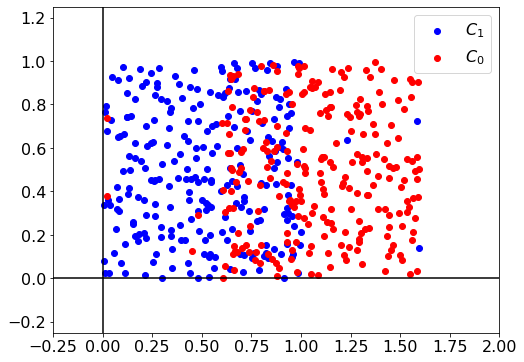

In [3]:
vIdx1 = vY == 1
plt.figure(figsize=(8,6))
plt.scatter(mX[~vIdx1,0], mX[~vIdx1,1],   color='b', label='$C_1$')
plt.scatter(mX[vIdx1,0],  mX[vIdx1,1],    color='r', label='$C_0$')
plt.legend()
plt.axvline(x=0, color='k')
plt.axhline(y=0, color='k')
plt.axis([-.25, 2, -.25, 1.25])
plt.show()

### Train a K-nn Classifier

In [4]:
from sklearn.neighbors import KNeighborsClassifier

#-- make grid for plot:
v0       = np.linspace(mX[:,0].min(), mX[:,0].max(), 150)
v1       = np.linspace(mX[:,1].min(), mX[:,1].max(), 150)
XX0, XX1 = np.meshgrid(v0, v1)
XX       = np.c_[XX0.ravel(), XX1.ravel()]

def PlotKnn(K):
    #-- Train the linear SVM:
    KnnClassifier = KNeighborsClassifier(n_neighbors=K).fit(mX, vY)
    
    #-- Plot classification:
    plt.figure(figsize=(8, 8))
    Z = KnnClassifier.predict(XX)
    Z = Z.reshape(XX0.shape)

    plt.contourf(XX0, XX1, Z, colors=['blue', 'red'], alpha=0.3)
    plt.scatter(mX[~vIdx1,0], mX[~vIdx1,1], color='b', label='$C_1$')
    plt.scatter(mX[vIdx1,0],  mX[vIdx1,1],  color='r', label='$C_0$')
    plt.title('$K = ' + str(K) + '$')

In [5]:
from ipywidgets import interact, IntSlider, Layout

kSlider = IntSlider(min=1, max=9, step=2, value=1, layout=Layout(width='80%'))
interact(PlotKnn, K=kSlider)
plt.show()

interactive(children=(IntSlider(value=1, description='K', layout=Layout(width='80%'), max=9, min=1, step=2), O…

### Exercise:
Train a K-NN classifier on the breast cancer data.  
* What is the (train) accuracy when $K=1$?  

In [6]:
from sklearn.datasets import load_breast_cancer

dData = load_breast_cancer()
mX    = dData.data
vY    = dData.target

In [7]:
#-- Normalize data:
mX    = mX - np.mean(mX, axis=0)
mX    = mX / np.std (mX, axis=0)

mX.shape, vY.shape

((569, 30), (569,))

In [8]:
KnnClassifier = ???
KnnClassifier.score(mX, vY)

SyntaxError: invalid syntax (<ipython-input-8-7bf592cb943f>, line 1)